# Project Task: Week 1


## Data Exploration: 

## A)To import data set into working enviorment

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_path = "..\\data\\input\\"
intermediate_path = "..\\data\\intermediate\\"
output_path = "..\\data\\output\\"

In [3]:
df = pd.read_csv(input_path + "health care diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.to_csv(intermediate_path + "Premodel_Processed_Data.csv", index = False)

In [6]:
df = pd.read_csv(intermediate_path + "Premodel_Processed_Data.csv")

# 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

## A)To convert zeros into null values

In [7]:
df["Glucose"]=df["Glucose"].replace(0,np.nan)
df["BloodPressure"]=df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["Insulin"]=df["Insulin"].replace(0,np.nan)
df["BMI"]=df["BMI"].replace(0,np.nan)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# 2. Visually explore these variables using histograms. Treat the missing values accordingly.

## A)For exploring variables all together we Generate the pandas profiling report

In [9]:
pfr = ProfileReport(df)

In [10]:
pfr.to_file(output_path + "EDA_of_Diabetics_Prediction.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## B)Use KNN- Imputer or Decision Tree Imputer for imputing missing data points 

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [12]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [13]:
import seaborn as sns

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

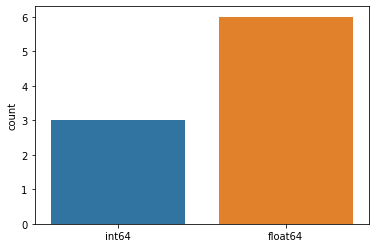

In [14]:
sns.countplot(df.dtypes.map(str))
df.dtypes

# Project Task: Week 2

## Data Exploration:

# 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

## A) To create a plot in notebook with count of different classes of Outcome variable

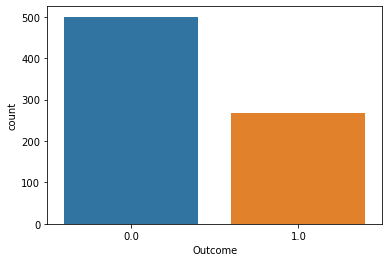

In [15]:
sns.countplot(x="Outcome", data=df1)

# 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

## A) To Create Scatter plot b/w variables (Independent variable)

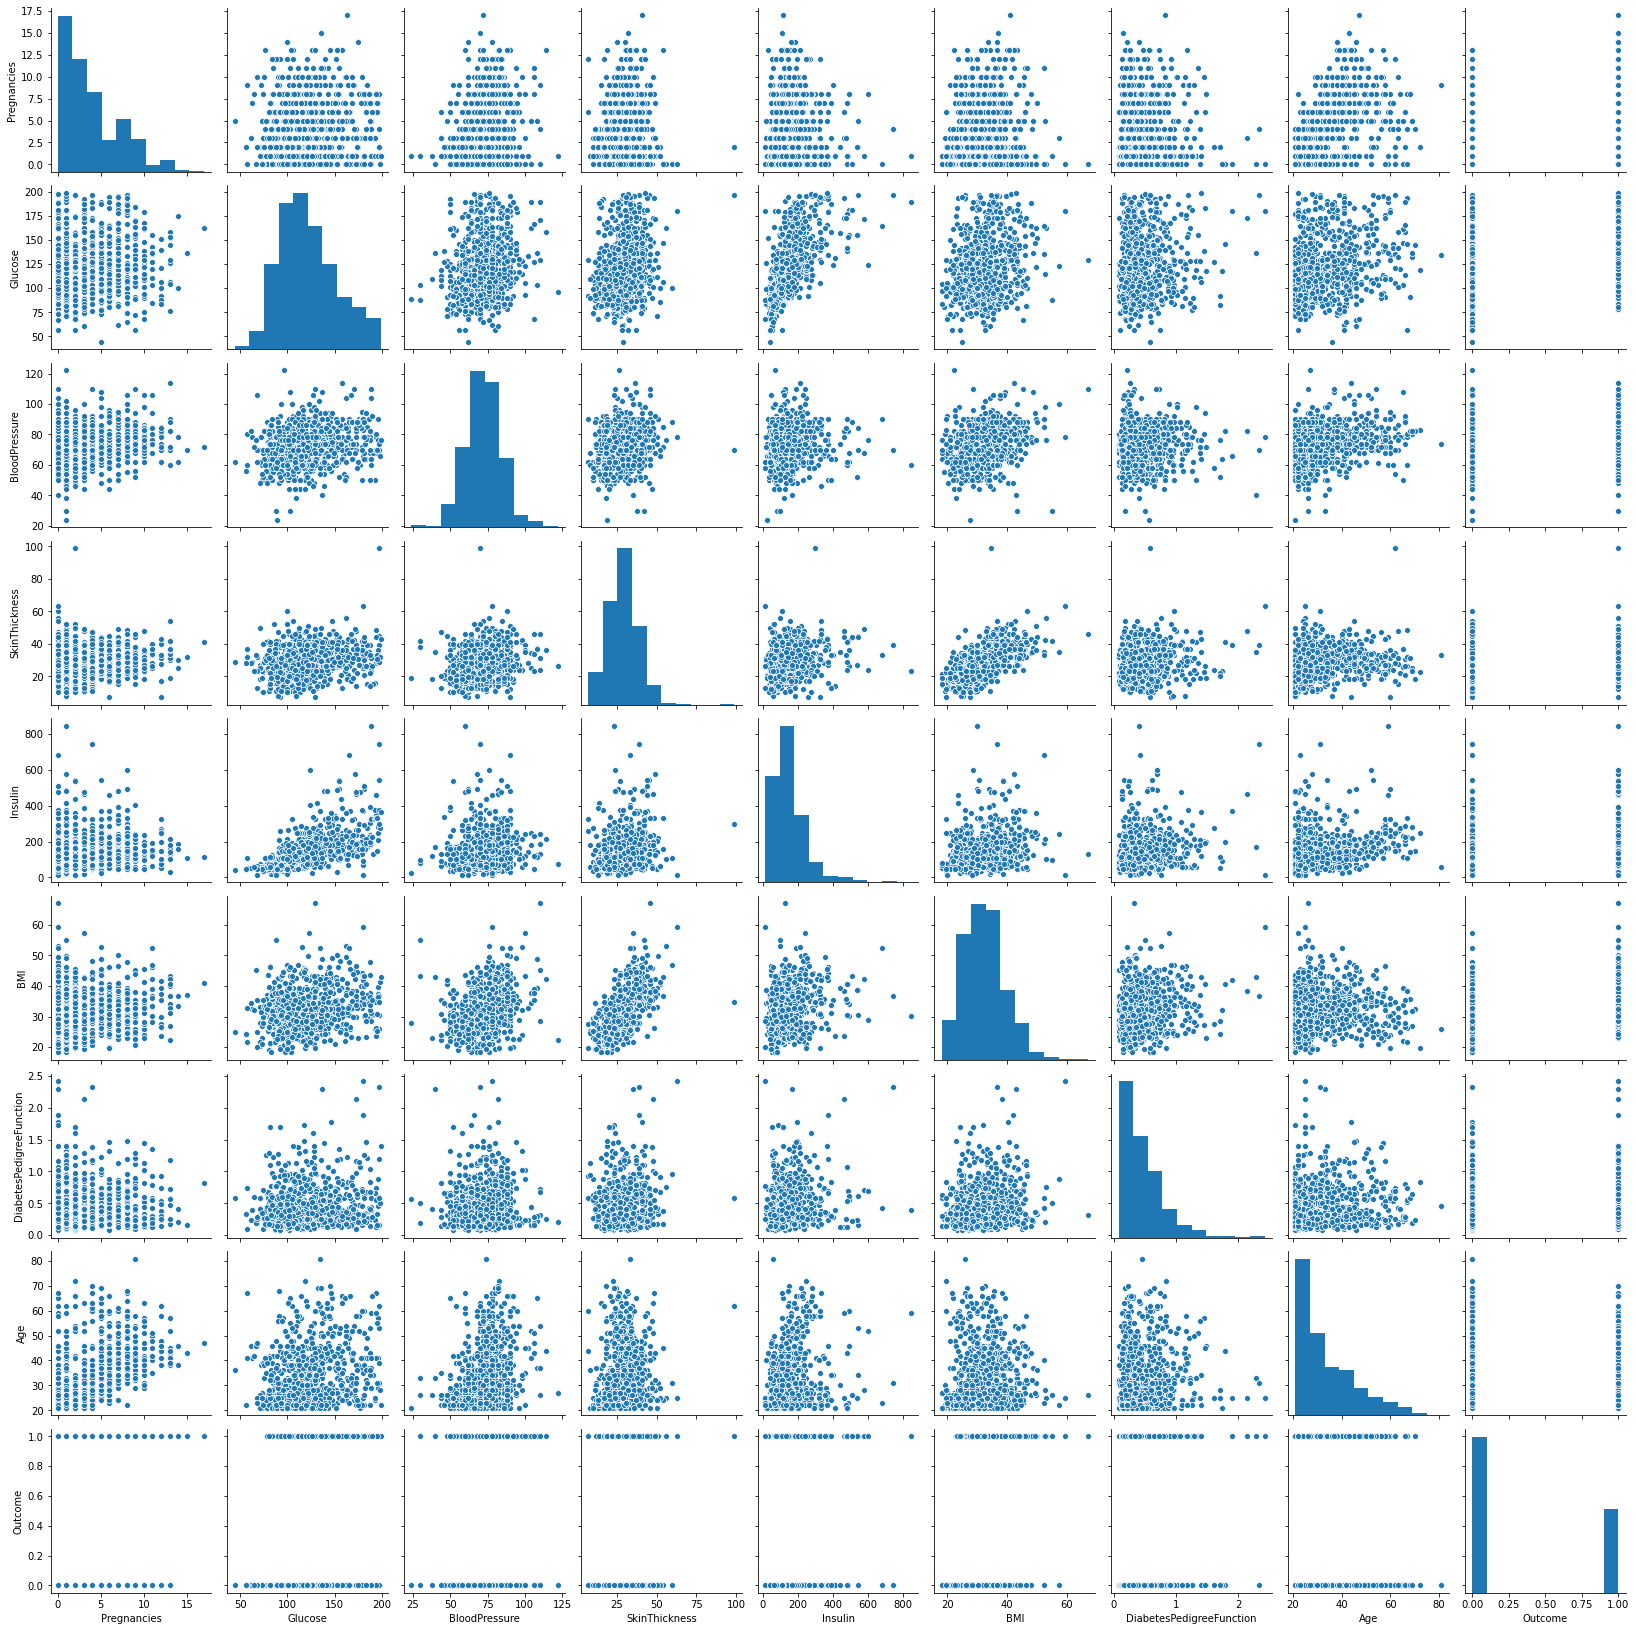

In [16]:
sns.pairplot(df1)

# 3. Perform correlation analysis. Visually explore it using a heat map.

## A)To perform correlation analysis and Visually explore it using a heat map.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.131230       0.218327       0.102406   
Glucose                      0.131230  1.000000       0.233992       0.246807   
BloodPressure                0.218327  0.233992       1.000000       0.230225   
SkinThickness                0.102406  0.246807       0.230225       1.000000   
Insulin                      0.061377  0.628432       0.134373       0.245197   
BMI                          0.023323  0.238457       0.294618       0.639370   
DiabetesPedigreeFunction    -0.033523  0.139226       0.006323       0.113957   
Age                          0.544341  0.270115       0.337930       0.149474   
Outcome                      0.221898  0.495853       0.176665       0.279530   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.061377  0.023323                 -0.033523   
Glucose                   0.628432  0.238

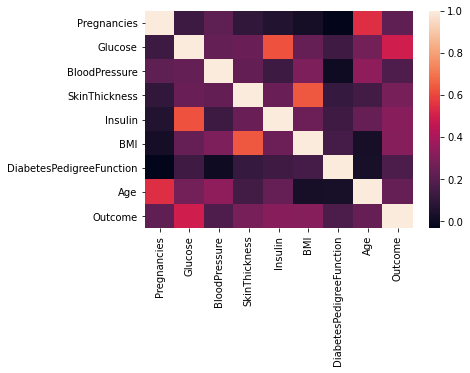

In [17]:
corr = df1.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

## B) To come up with conclusion on Co-relation 

there is no co-relation between features

# Project Task: Week 3


## Data Modeling:

# 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

## A)Dataset Preparation (splitting and normalization)

In [18]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
#split our X & y

X = df1.drop('Outcome', axis=1)
y = df1.Outcome

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# B)Split our dataset into train and test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state =21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [22]:
! pip install dabl

# Baseline Model using DABL SimpleClassifier()

In [23]:
import dabl
ec = dabl.SimpleClassifier(random_state=0).fit(df1, target_col='Outcome')
ec

Running DummyClassifier(strategy='prior')
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394

Running GaussianNB()
accuracy: 0.659 average_precision: 0.593 roc_auc: 0.775 recall_macro: 0.522 f1_macro: 0.450
=== new best GaussianNB() (using recall_macro):
accuracy: 0.659 average_precision: 0.593 roc_auc: 0.775 recall_macro: 0.522 f1_macro: 0.450

Running MultinomialNB()
accuracy: 0.672 average_precision: 0.534 roc_auc: 0.700 recall_macro: 0.574 f1_macro: 0.564
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.672 average_precision: 0.534 roc_auc: 0.700 recall_macro: 0.574 f1_macro: 0.564

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.711 average_precision: 0.506 roc_auc: 0.706 recall_macro: 0.706 f1_macro: 0.694
=== new best DecisionTreeClas

SimpleClassifier(random_state=0)

# Feature Importance using DABL on Best Model: Logistic Regression

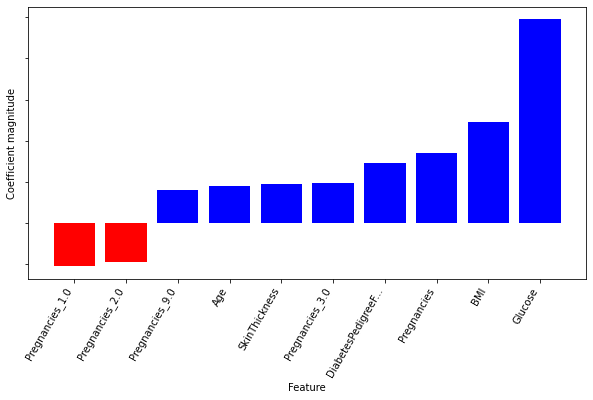

In [24]:
dabl.explain(ec) 

# 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

## A)To Create a base classifier model for the prediction

In [25]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
svm_pred = svc_model.predict(X_test)
#R2 score 
print("R2 Value : {}". format(svc_model.score(X_test,y_test)))

R2 Value : 0.7229437229437229


In [26]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_test_log_pred = logReg.predict(X_test)
#R2 score 
print("R2 Value : {}". format(logReg.score(X_test,y_test)))

R2 Value : 0.7445887445887446


In [27]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(X_train,y_train)
nb_pred=nb_clf.predict(X_test)
#R2 score 
print("R2 Value : {}". format(nb_clf.score(X_test,y_test)))

R2 Value : 0.7142857142857143


In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train,y_train)
ds_predicted = decision_tree.predict(X_test)
#R2 score 
print("R2 Value : {}". format(decision_tree.score(X_test,y_test)))

R2 Value : 0.6666666666666666


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state= 21)
classifier.fit(X_train,y_train)
y_pred_redom_forest= classifier.predict(X_test)
#R2 score 
print("R2 Value : {}". format(classifier.score(X_test,y_test)))

R2 Value : 0.7402597402597403


In [30]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)
xgb_pred = xgboost.predict(X_test)
#R2 score 
print("R2 Value : {}". format(xgboost.score(X_test,y_test)))

[10:35:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
R2 Value : 0.7229437229437229


## B)To Create KNN classifier models for the prediction

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train,y_train)
y_test_knn_pred = knn.predict(X_test)
#R2 score 
print("R2 Value : {}". format(knn.score(X_test,y_test)))

R2 Value : 0.683982683982684


# C)To compare various models with the results from KNN algorithm

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Accuracy Score for test data in logistic model is')
print(metrics.accuracy_score(y_test,y_test_log_pred)*100)
print('Accuracy Score for test data in rendom forest model is')
print(metrics.accuracy_score(y_pred_redom_forest,y_test)*100)
print('Accuracy Score for test data in support vector machine model is:')
print(metrics.accuracy_score(y_test,svm_pred)*100)
print('Accuracy Score for test data in xgboast model is')
print(metrics.accuracy_score(xgb_pred ,y_test)*100)
print('Accuracy Score for test data in Naive Bayes model is')
print(metrics.accuracy_score(nb_pred,y_test)*100)
print('Accuracy Score for test data in KNN model is:')
print(metrics.accuracy_score(y_test,y_test_knn_pred)*100)
print('Accuracy Score for test data in Decision Tree model is')
print(metrics.accuracy_score(ds_predicted,y_test)*100)

Accuracy Score for test data in logistic model is
74.45887445887446
Accuracy Score for test data in rendom forest model is
74.02597402597402
Accuracy Score for test data in support vector machine model is:
72.2943722943723
Accuracy Score for test data in xgboast model is
72.2943722943723
Accuracy Score for test data in Naive Bayes model is
71.42857142857143
Accuracy Score for test data in KNN model is:
68.3982683982684
Accuracy Score for test data in Decision Tree model is
66.66666666666666


# D)conclusion

From all of the above algorithams the logistic model clssifier has the highest accuracy of 74.45887445887446%

and rendom forest clssifier has the second highest accuracy of 74.02597402597402

# Project Task: Week 4

## Data Modeling:

# 1.Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

# A)Creating a classification report and analysing sensitivity, specificity score of each of the classifiers

In [34]:
print("classification report  and confusion matrix of support vector machine model is")
print(classification_report(y_test , svm_pred))
cm1 = confusion_matrix(y_test ,svm_pred)
print('Confusion Matrix : \n', cm1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])

classification report  and confusion matrix of support vector machine model is
              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       144
         1.0       0.73      0.43      0.54        87

    accuracy                           0.72       231
   macro avg       0.72      0.66      0.67       231
weighted avg       0.72      0.72      0.70       231

Confusion Matrix : 
 [[130  14]
 [ 50  37]]


In [35]:
print("classification report  and confusion matrix  of logistic model is")
print(classification_report(y_test , y_test_log_pred))
cm2 = confusion_matrix(y_test ,  y_test_log_pred)
print('Confusion Matrix : \n', cm2)
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])

classification report  and confusion matrix  of logistic model is
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.82       144
         1.0       0.75      0.48      0.59        87

    accuracy                           0.74       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.74      0.73       231

Confusion Matrix : 
 [[130  14]
 [ 45  42]]


In [36]:
print("classification report  and confusion matrix of Naive Bayes model is")
print(classification_report(y_test ,nb_pred))
cm3 = confusion_matrix(y_test ,nb_pred)
print('Confusion Matrix : \n', cm3)
sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])

classification report  and confusion matrix of Naive Bayes model is
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       144
         1.0       0.66      0.49      0.57        87

    accuracy                           0.71       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.71      0.71      0.70       231

Confusion Matrix : 
 [[122  22]
 [ 44  43]]


In [37]:
print("classification report  and confusion matrix of Decision Tree model is")
print(classification_report(y_test ,ds_predicted))
cm4 = confusion_matrix(ds_predicted ,y_test)
print('Confusion Matrix : \n', cm4)
sensitivity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])

classification report  and confusion matrix of Decision Tree model is
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       144
         1.0       0.56      0.55      0.55        87

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231

Confusion Matrix : 
 [[106  39]
 [ 38  48]]


In [38]:
print("classification report and confusion matrix of rendom forest model is")
print(classification_report(y_test , y_pred_redom_forest))
cm5 = confusion_matrix(y_test ,  y_pred_redom_forest)
print('Confusion Matrix : \n', cm5)
sensitivity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
specificity5 = cm5[1,1]/(cm5[1,0]+cm5[1,1])

classification report and confusion matrix of rendom forest model is
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       144
         1.0       0.73      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231

Confusion Matrix : 
 [[128  16]
 [ 44  43]]


In [39]:
print("classification report and confusion matrix of xgboast model is")
print(classification_report(y_test , xgb_pred))
cm6 = confusion_matrix(y_test ,  xgb_pred)
print('Confusion Matrix : \n', cm6)
sensitivity6 = cm6[0,0]/(cm6[0,0]+cm6[0,1])
specificity6 = cm6[1,1]/(cm6[1,0]+cm6[1,1])

classification report and confusion matrix of xgboast model is
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       144
         1.0       0.67      0.52      0.58        87

    accuracy                           0.72       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.72      0.71       231

Confusion Matrix : 
 [[122  22]
 [ 42  45]]


In [40]:
print("classification report  and confusion matrix of knn model is")
print(classification_report(y_test , y_test_knn_pred))
cm7 = confusion_matrix(y_test , y_test_knn_pred)
print('Confusion Matrix : \n', cm7)
sensitivity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])
specificity7 = cm7[1,1]/(cm7[1,0]+cm7[1,1])

classification report  and confusion matrix of knn model is
              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       144
         1.0       0.61      0.44      0.51        87

    accuracy                           0.68       231
   macro avg       0.66      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231

Confusion Matrix : 
 [[120  24]
 [ 49  38]]


In [41]:
print('Sensitivity of logistic model:', sensitivity2)
print('Sensitivity of svm model:', sensitivity1)
print('Sensitivity of rendom forest model:', sensitivity5)
print('Sensitivity of Naive Bayes model:', sensitivity3)
print('Sensitivity of xgboast model:', sensitivity6 )
print('Sensitivity of knn model:', sensitivity7 )
print('Sensitivity of Decision Tree model:', sensitivity4)

Sensitivity of logistic model: 0.9027777777777778
Sensitivity of svm model: 0.9027777777777778
Sensitivity of rendom forest model: 0.8888888888888888
Sensitivity of Naive Bayes model: 0.8472222222222222
Sensitivity of xgboast model: 0.8472222222222222
Sensitivity of knn model: 0.8333333333333334
Sensitivity of Decision Tree model: 0.7310344827586207


In [42]:
print('Specificity of Decision Tree model:', specificity4)
print('Specificity of xgboast model:', specificity6)
print('Specificity of Naive Bayes model:', specificity3)
print('Specificity of rendom forest model:', specificity5)
print('Specificity of logistic model:', specificity2)
print('Specificity of knn model: ', specificity7)
print('Specificity of svm:', specificity1)

Specificity of Decision Tree model: 0.5581395348837209
Specificity of xgboast model: 0.5172413793103449
Specificity of Naive Bayes model: 0.4942528735632184
Specificity of rendom forest model: 0.4942528735632184
Specificity of logistic model: 0.4827586206896552
Specificity of knn model:  0.4367816091954023
Specificity of svm: 0.42528735632183906


# B)Now lets create ROC cure and check out the area under curve of each classifier

In [43]:
from sklearn.metrics import plot_roc_curve

In [44]:
import matplotlib.pyplot as plt

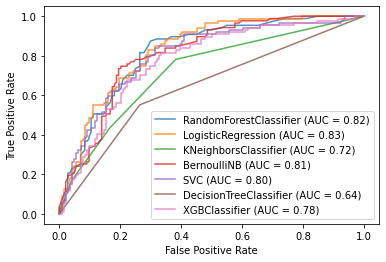

In [46]:
ax=plt.gca()
rfc_disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)
logReg_disp = plot_roc_curve(logReg , X_test, y_test,ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test,ax=ax, alpha=0.8)
nb_disp = plot_roc_curve(nb_clf, X_test, y_test,ax=ax, alpha=0.8)
svm_disp = plot_roc_curve(svc_model, X_test, y_test,ax=ax, alpha=0.8)
dis_tree_disp = plot_roc_curve(decision_tree, X_test, y_test,ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(xgboost, X_test, y_test,ax=ax, alpha=0.8)
plt.show()

# C)To explain what values of all the above parameter are salected ? and why ?

## 1.Accuracy - (True possitive + True negative)/Total number of predictions

accuracy in this case means -: The patients which are correctly predicted as having diabetis or not having diabetis with respect to total no. of predictions. 

accuracy should be high to say that model is a good fit. From the above accuracy comperison we found that 

logistic model classifier has the highest accuracy that is 74.45887445887446%

rendom forest model is at second possition with accuracy of 74.02597402597402%

## 2.From classificasion report


## A)precision-:TruePositives /actual results   


## actual results=(TruePositives + FalsePositives)
Precision quantifies the number of positive class predictions that actually belong to the positive class.

Higher precision means that an algorithm returns more relevant results than irrelevant ones

so, our model should have high precison 

logistic regression model classifier is most precised from all the above classifier with precision of - 75% 

rendom forest classifier is second most precised from all the above classifier with precision of - 74% 

## B)recall-:TruePositives  / predicted results

## predicted results=(TruePositives +False Negative) 
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned)

so, our model should have high recall.

logistic regression model classifier has the highest recall value from all the above classifier with recall of - 89% 

rendom forest classifier has the second highest recall value from all the above classifier with recall of - 89% 

## C)F1-score-: (2 * Precision * Recall) / (Precision + Recall)
F-Measure provides a single score that balances both the concerns of precision and recall in one number.

hance a best fit model should have high f1-scre

logistic regression classifier has the best f1-score of -82%

rendom forest classifier has the second best f1-score of -81%

## 3. From analysis of sensitivity, specificity, AUC(ROC curve)

## A)Sensitivity(True Positive rate) -:TruePositives /(TruePositives +FalseNegative)
measures the proportion of positives that are correctly identified. high Sensitivity means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned)

In our business case sensitivity signifies that how many womens are having diabeties from all those womens are correctly classified as having or not having diabeties

so, our model should have high Sensitivity.

Sensitivity of logistic model: 0.9027777777777778 

Sensitivity of rendom forest model: 0.8888888888888888

## B)Specificity(True Negative rate)-:(True Negative)/(TrueNegative+FalsePositives)
measures the proportion of negatives that are correctly identified

In our business case Specificity signifies that how many womens are not having diabeties from all those womens that are correctly classified as having or not having diabeties.

so, our model should have high Specificity.

Specificity of Decision Tree model: 0.5116279069767442

Specificity of logistic model: 0.4827586206896552

## C)AUC(ROC curve)-:Plot of a classifier  with x-axis as false positive rate  and y-axis as true positive rate
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

with change of the throushold values the curve should note move away from the y-axis as much as possible as it increases the false positive rate. which means that it will increase the probablity of classifyig a persion to have dibeties which actually does not have diabeties.

logistic regression model (auc)-83%

rendom forest classifier (auc)-82%

# D)Conclusion

## From all above analysis we found that
rendom forest classifier and logistic regression classifier are the best fitting models.

one should go with the rendom forest model if higher specificity required

whereas, one should chose logistic regression model if need higher sensitivity

# validating framework= Running Grid Search on both the algoritham to find best one directly

In [47]:
from sklearn.model_selection import GridSearchCV
logReg_params = {'C': [0.1, 0.01],
                     'tol': [0.001, 0.01],
                     'max_iter': [1000, 2000]}
classifier1 = RandomForestClassifier()
classifier_params = {'n_estimators': [25,50,100],
                      'max_depth': [25,30],
                      'min_samples_leaf': [2,4],
                      'min_samples_split': [4,6,3]}
grid = zip([logReg,classifier1],[logReg_params,classifier_params])

best_clf = None
# perform grid search and select the model with best cv set scores
for model_pipeline, param in grid:
    temp = GridSearchCV(model_pipeline,param_grid=param, cv=10, n_jobs=-1)
    temp.fit(X_train,y_train)
    if best_clf is None:
        best_clf = temp
    else:
        if temp.best_score_ > best_clf.best_score_:
            best_clf = temp
print ("Best CV Score",best_clf.best_score_)
print ("Model Parameters",best_clf.best_params_)
print("Best Estimator",best_clf.best_estimator_)

Best CV Score 0.7914395527603075
Model Parameters {'C': 0.01, 'max_iter': 1000, 'tol': 0.001}
Best Estimator LogisticRegression(C=0.01, max_iter=1000, tol=0.001)


In [48]:
predictions = best_clf.predict(X_test)
probs = best_clf.predict_proba(X_test)[:, 1]
print("Classification Report")
print (classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
print('Confusion Matrix : \n', cm)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm7[1,0]+cm[1,1])
print(sensitivity)
print(specificity)

Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.92      0.80       144
         1.0       0.73      0.34      0.47        87

    accuracy                           0.71       231
   macro avg       0.72      0.63      0.63       231
weighted avg       0.71      0.71      0.67       231

Confusion Matrix : 
 [[133  11]
 [ 57  30]]
0.9236111111111112
0.379746835443038


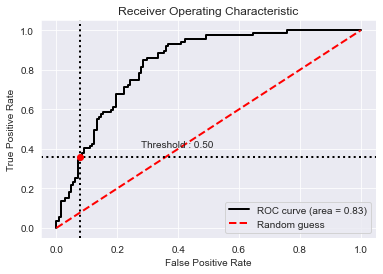

In [49]:
! pip install plot_metric
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,probs, labels=["Class 1", "Class 2"])

# Figures
plt.figure()
bc.plot_roc_curve()
plt.show()

In [50]:
! pip install pycaret

In [51]:
from pycaret import classification
classification_setup = classification.setup(data= df1, target='Outcome')

,Description,Value
0,session_id,8408
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7541,0.0000,0.5085,0.6918,0.5825,0.4148,0.4268,0.0310
lr,Logistic Regression,0.7505,0.8121,0.5029,0.6813,0.5754,0.4054,0.4165,0.2760
lda,Linear Discriminant Analysis,0.7504,0.8113,0.5085,0.6813,0.5789,0.4077,0.4184,0.0110
ada,Ada Boost Classifier,0.7448,0.7931,0.5792,0.6416,0.6067,0.4193,0.4219,0.0300
gbc,Gradient Boosting Classifier,0.7430,0.8072,0.5848,0.6441,0.6072,0.4179,0.4236,0.0390
rf,Random Forest Classifier,0.7429,0.8148,0.5456,0.6517,0.5882,0.4045,0.4119,0.0770
et,Extra Trees Classifier,0.7411,0.8159,0.4971,0.6660,0.5627,0.3856,0.3979,0.0730
nb,Naive Bayes,0.7374,0.7965,0.5851,0.6259,0.6019,0.4070,0.4096,0.0070
catboost,CatBoost Classifier,0.7299,0.8211,0.5187,0.6301,0.5638,0.3719,0.3791,1.7310
lightgbm,Light Gradient Boosting Machine,0.7282,0.7889,0.5518,0.6121,0.5753,0.3777,0.3821,0.1510


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8408,
                solver='auto', tol=0.001)

# Best Model: AdaBoost Classifier

In [53]:
classification_cat = classification.create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8256,0.6667,0.6667,0.6667,0.5000,0.5000
1,0.8148,0.8480,0.6667,0.7500,0.7059,0.5714,0.5735
2,0.7222,0.7515,0.5556,0.5882,0.5714,0.3662,0.3665
3,0.6296,0.7037,0.5000,0.4500,0.4737,0.1892,0.1898
4,0.7222,0.7820,0.4737,0.6429,0.5455,0.3520,0.3605
5,0.8333,0.8767,0.6842,0.8125,0.7429,0.6209,0.6259
6,0.7593,0.8406,0.5789,0.6875,0.6286,0.4524,0.4561
7,0.6981,0.7508,0.5000,0.5625,0.5294,0.3083,0.3095
8,0.6981,0.7476,0.4444,0.5714,0.5000,0.2886,0.2933
9,0.7925,0.8048,0.7222,0.6842,0.7027,0.5435,0.5439


# Data Reporting:


# 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

# To craete tableau deshboard lets convert the dataframe data to a csv file and work on tableau software.

In [54]:
df1.to_excel(output_path + "Tableau_healthcare_diabeties.xlsx", index = False)